In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data taken from: https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/unterschiede/zentral/mann.html#Quick_Start
df_patients = (
    pd.read_csv("cardiac_patients.csv", sep=",")
      .rename(columns={
          "ID": "id",
          "Gruppe": "group", # group 1: cardiac patient, group 2: no cardiac patient
          "Wohlbefinden": "well_being", # the lower the better
          "Ränge": "rank",
          "Ränge Gruppe 1": "rank_group_one",
          "Ränge Gruppe 2": "rank_group_two"
      })
)

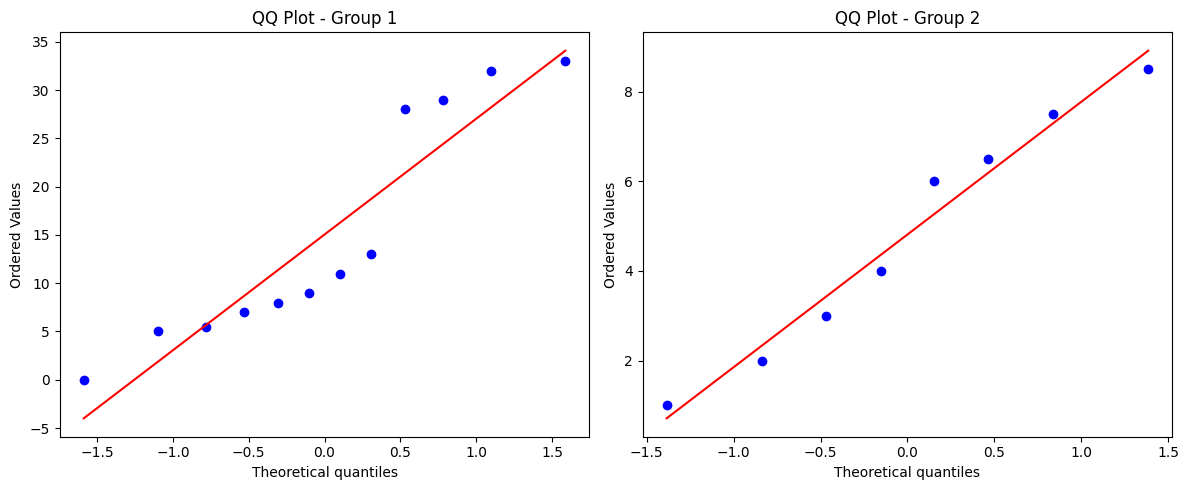

In [3]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_patients[df_patients["group"] == 1]["well_being"], dist="norm", plot=plt)
plt.title("QQ Plot - Group 1")

plt.subplot(1, 2, 2)
stats.probplot(df_patients[df_patients["group"] == 2]["well_being"], dist="norm", plot=plt)
plt.title("QQ Plot - Group 2")

plt.tight_layout()
plt.show()


In [6]:
df_group_1 = df_patients[df_patients["group"] == 1]
df_group_1

,id,group,well_being,rank,rank_group_one,rank_group_two
0,5,1,0.0,1,1.0,NaN
5,10,1,5.0,6,6.0,NaN
6,19,1,5.5,7,7.0,NaN
9,17,1,7.0,10,10.0,NaN
11,11,1,8.0,12,12.0,NaN
13,2,1,9.0,14,14.0,NaN
14,20,1,11.0,15,15.0,NaN
15,12,1,13.0,16,16.0,NaN
16,16,1,28.0,17,17.0,NaN
17,4,1,29.0,18,18.0,NaN


In [7]:
df_group_2 = df_patients[df_patients["group"] == 2]
df_group_2

,id,group,well_being,rank,rank_group_one,rank_group_two
1,6,2,1.0,2,NaN,2.0
2,14,2,2.0,3,NaN,3.0
3,9,2,3.0,4,NaN,4.0
4,18,2,4.0,5,NaN,5.0
7,1,2,6.0,8,NaN,8.0
8,8,2,6.5,9,NaN,9.0
10,15,2,7.5,11,NaN,11.0
12,3,2,8.5,13,NaN,13.0


In [ ]:
u1_statistic, p_value = stats.mannwhitneyu(df_group_1['well_being'],
                   df_group_2['well_being'],
                   alternative='two-sided')

n1 = len(df_group_1)
n2 = len(df_group_2)

u2_statistic = n1 * n2 - u1_statistic

# number of times an observation in Group 1 is ranked higher than an observation in Group 2 (plus half a point for ties)
# in 77 out of the 96 possible pairwise comparisons, Group 2 values were larger than Group 1 values.
print(f"U1-Statistic: {u1_statistic}")
# number of times an observation in Group 2 is ranked higher than an observation in Group 1 (plus half a point for ties)
# in only 19 out of the 96 possible pairwise comparisons, Group 1 values were larger than Group 2 values.
print(f"U2-Statistic: {u2_statistic}")
# at a significance level of 5% we can reject H0 that expected wellbeing of group 1 is similar to the expected wellbeing of group 2
print(f"P-Value: {p_value}")

U1-Statistic: 77.0
U2-Statistic: 19.0
P-Value: 0.02524410573946178


A Mann-Whitney U test was conducted to compare the expected well-being between group 1 (cardiac treatment) and group 2 (no cardiac treatment). The test revealed a statistically significant difference between the groups (U = 77.0, p = 0.025), indicating that the distributions of well-being differ between the two groups. Therefore, we reject the null hypothesis that the expected well-being of group 1 is similar to that of group 2 at the 5% significance level.